# Imports

In [114]:
#Import package
from urllib.request import urlretrieve

#Import pandas
import pandas as pd

#regex
import re

#data explore
import numpy as np

#import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

#math
import math

#formatting
pd.set_option('display.max_columns', None)

In [115]:
#CSS Styles
from IPython.core.display import HTML
css = open('css/style-table.css').read() + open('css/style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

# Get Dataset

In [145]:
# Get the dataset from UCI
# let it take a minute
print("Wait for the data...")

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls'

# convert xl file to pandas df
df = pd.read_excel(url, header=1)

# print success messsage
print("Data downloaded.")

Wait for the data...
Data downloaded.


# Cleaning up the Data

In [146]:
#convert columns names to lowercase
df.columns = (x.lower() for x in df.columns)

#print columns
print(df.columns)

Index(['id', 'limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_0',
       'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2',
       'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6',
       'default payment next month'],
      dtype='object')


In [147]:
#drop column
del df['id']

In [148]:
#rename columns
df.columns = ['limit_bal', 'sex', 'ed.', 'married', 'age',
       'p1', 'p2', 'p3', 'p4', 'p5', 'p6',
       'b1', 'b2', 'b3', 'b4', 'b5', 'b6', 
       'pymt1', 'pymt2', 'pymt3', 'pymt4', 'pymt5', 'pymt6',
       'default pymt nxt mo.']


In [149]:
#examine the data
df.head(3)

,limit_bal,sex,ed.,married,age,p1,p2,p3,p4,p5,p6,b1,b2,b3,b4,b5,b6,pymt1,pymt2,pymt3,pymt4,pymt5,pymt6,default pymt nxt mo.
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


# Working with the Data

In [150]:
#number of customers with at least one late payment
len( df[(df.p1 > 0) | (df.p2 > 0) | (df.p3 > 0) | (df.p4 > 0) | (df.p5 > 0) | (df.p6 > 0)] )

10069

# Having trouble (solved in a different way further down)
I want to add a missed payments column in this fashion:
if a number from the columns p1, p2, p3, p4, p5, p6 is greater than zero then a payment was missed.

I tried list comprehension and a lambda to create a "missed payment" column from the the p1 to p6 columns, and I also tried creating a function.

In [151]:
def postiv(x):
    if x > 0:
        return x
    else:
        return 0
    
#del df["missed_payments"]   
#tried a lambda and the function above to create a "missed payment" column from the the p1 to p6 columns

#df["missed_payments"] = 

In [152]:
#xx = df["missed_payments"].sort_values(ascending=False)

In [153]:
#xx.head()

# Why doesn't comprehension work? (Cleaning the Marriage Column)
Comprehension doesn't work for me, so I used a "for loop"

In [154]:
print(df.groupby("married").size())
#the data already contains 0 values, even though 0 isn't defined in the documentation
#move the 0 values to the "other" category (value = 3)
for x in range(len(df)):
    if df.iloc[x][3] == 0:
        df.loc[x][3] = 3
print(df.groupby("married").size())


#change df.married to married = 1, and single = 0, other = 3 (originally 2 indicated single)
for x in range(len(df)):
    if df.iloc[x][3] == 2:
        df.loc[x][3] = 0
        
#I tried to use comprehension on this, but it was producing an error
#item.married = 0 for item in df if item.married == 2

print(df.groupby("married").size())

married
0       54
1    13659
2    15964
3      323
dtype: int64
married
1    13659
2    15964
3      377
dtype: int64
married
0    15964
1    13659
3      377
dtype: int64


In [155]:
#double check the total amount (should be 30000)
len(df[df.married == 0]) + len(df[df.married == 1]) + len(df[df.married == 3])

30000

# Cleaning the Education Column
The documentation states: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others), yet the data contains 0, 5, and 6

In [156]:
print(df.groupby('ed.').size())

#or statements didn't work (if df.iloc[x].loc["ed."] == 0 | df.iloc[x].loc["ed."] == 5 | df.iloc[x].loc['ed.'] == 6:)
for x in range(len(df)):
    if df.iloc[x].loc["ed."] == 0:
        df.iloc[x].loc['ed.'] = 4
        
for x in range(len(df)):
    if df.iloc[x].loc["ed."] == 5:
        df.iloc[x].loc['ed.'] = 4
        
for x in range(len(df)):
    if df.iloc[x].loc["ed."] == 6:
        df.iloc[x].loc['ed.'] = 4
        
df.groupby('ed.').size()

ed.
0       14
1    10585
2    14030
3     4917
4      123
5      280
6       51
dtype: int64


ed.
1    10585
2    14030
3     4917
4      468
dtype: int64

# Working with specific columns

In [157]:
#break out specific column groups
p = df[['p1', 'p2', 'p3', 'p4', 'p5', 'p6']]
b = df[['b1', 'b2', 'b3', 'b4', 'b5', 'b6']]
pymt = df[['pymt1', 'pymt2', 'pymt3', 'pymt4', 'pymt5', 'pymt6']]

# Plotting payment delays

-2 = 2 months in advance,
-1 = 1 month in advance,
 0 = on time payment,
 1 = 1 month late,
 2 = 2 months late,
 3 = 3 months late,
 4 = 4 months late,
 5 = 5 months late,
 6 = 6 months late,
 7 = 7 months late,
 8 = 8 months late

Text(0.5, 1.0, '4/2005')

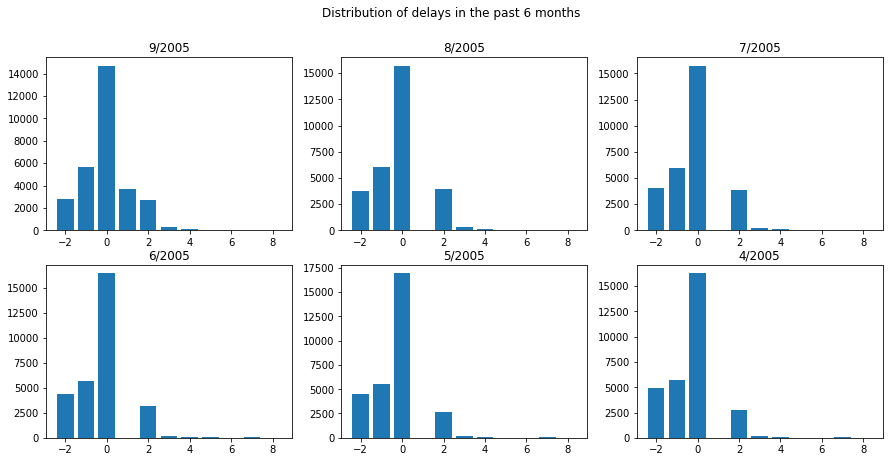

In [158]:
p1 = p.p1.value_counts().sort_index()
p2 = p.p2.value_counts().sort_index()
p3 = p.p3.value_counts().sort_index()
p4 = p.p4.value_counts().sort_index()
p5 = p.p5.value_counts().sort_index()
p6 = p.p6.value_counts().sort_index()

fig = plt.figure(figsize=(15, 7))
plt.suptitle('Distribution of delays in the past 6 months')

plt.subplot(231)
plt.bar(p1.index, p1.values)
plt.title("9/2005")

plt.subplot(2,3,2)
plt.bar(p2.index, p2.values)
plt.title("8/2005")

plt.subplot(2,3,3)
plt.bar(p3.index, p3.values)
plt.title("7/2005")

plt.subplot(2,3,4)
plt.bar(p4.index, p4.values)
plt.title("6/2005")

plt.subplot(2,3,5)
plt.bar(p5.index, p5.values)
plt.title("5/2005")

plt.subplot(236)
plt.bar(p6.index, p6.values)
plt.title("4/2005")

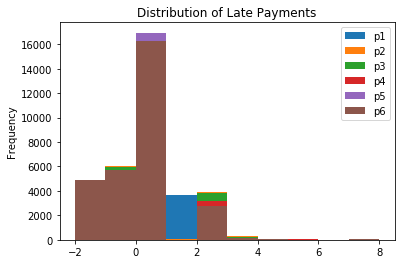

In [159]:
p.plot(kind = "hist", title = "Distribution of Late Payments")

In [160]:
#puts each bill amount into a range of 50,000 NT Dollars. For example $3,345 would be classified as 0-50,000
my_list = []
for item in b.b1:
    item = math.floor(item/50000)*50000
    my_list.append(item)

b1 = pd.Series(my_list)    
b1 = b1.value_counts().sort_index()

for item in b.b2:
    item = math.floor(item/50000)*50000
    my_list.append(item)

b2 = pd.Series(my_list)    
b2 = b2.value_counts().sort_index()

for item in b.b3:
    item = math.floor(item/50000)*50000
    my_list.append(item)

b3 = pd.Series(my_list)    
b3 = b3.value_counts().sort_index()

for item in b.b4:
    item = math.floor(item/50000)*50000
    my_list.append(item)

b4 = pd.Series(my_list)    
b4 = b4.value_counts().sort_index()

for item in b.b5:
    item = math.floor(item/50000)*50000
    my_list.append(item)

b5 = pd.Series(my_list)    
b5 = b5.value_counts().sort_index()

for item in b.b6:
    item = math.floor(item/50000)*50000
    my_list.append(item)

b6 = pd.Series(my_list)    
b6 = b6.value_counts().sort_index()

print(b1, '\n\n', b2, '\n\n', b3, '\n\n', b4, '\n\n', b5, '\n\n', b6)

-200000        2
-50000       588
 0         19903
 50000      4599
 100000     2168
 150000     1217
 200000      650
 250000      383
 300000      189
 350000      126
 400000       77
 450000       53
 500000       25
 550000       10
 600000        7
 650000        1
 700000        1
 950000        1
dtype: int64 

 -200000        2
-100000        2
-50000      1255
 0         40030
 50000      9137
 100000     4269
 150000     2390
 200000     1269
 250000      710
 300000      369
 350000      243
 400000      146
 450000       96
 500000       44
 550000       22
 600000       10
 650000        2
 700000        2
 950000        2
dtype: int64 

 -200000         3
-100000         3
-50000       1908
 0          60613
 50000      13518
 100000      6283
 150000      3501
 200000      1829
 250000      1002
 300000       536
 350000       350
 400000       202
 450000       147
 500000        54
 550000        29
 600000        11
 650000         5
 700000         2
 850000        

# Why doesn't anything show up in these plots?
dividing the index makes the lines show in the plot

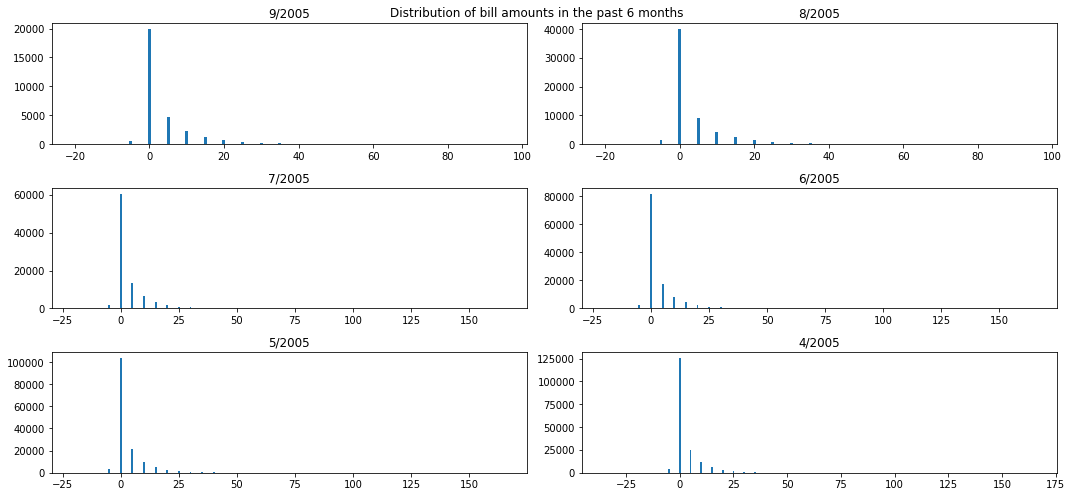

In [633]:
fig = plt.figure(figsize=(15, 7))
plt.suptitle('Distribution of bill amounts in the past 6 months')

plt.subplot(321)
plt.bar(b1.index/10000, b1.values)
plt.title("9/2005")

plt.subplot(322)
plt.bar(b2.index/10000, b2.values)
plt.title("8/2005")

plt.subplot(323)
plt.bar(b3.index/10000, b3.values)
plt.title("7/2005")

plt.subplot(324)
plt.bar(b4.index/10000, b4.values)
plt.title("6/2005")

plt.subplot(325)
plt.bar(b5.index/10000, b5.values)
plt.title("5/2005")

plt.subplot(326)
plt.bar(b6.index/10000, b6.values)
plt.title("4/2005")

fig.tight_layout()

Text(0.5, 1.0, '4/2005')

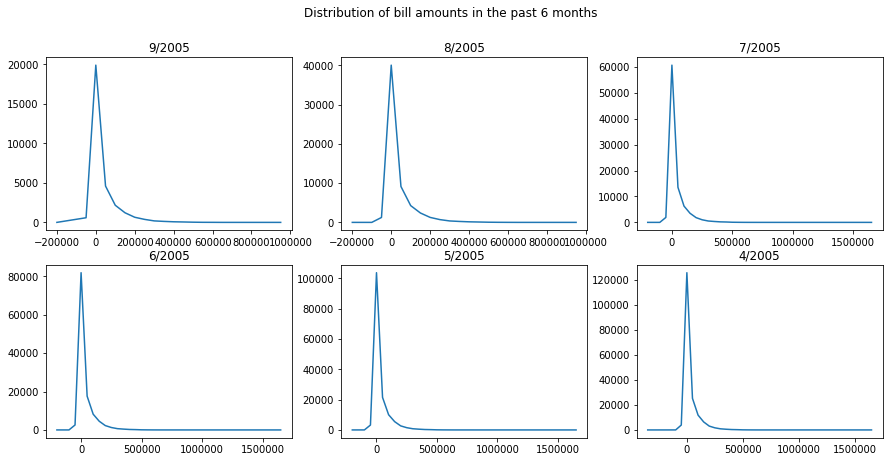

In [644]:
#trying another method (plot verus bar)

fig = plt.figure(figsize=(15, 7))
plt.suptitle('Distribution of bill amounts in the past 6 months')

plt.subplot(231)
plt.plot(b1.index, b1.values)
plt.title("9/2005")

plt.subplot(232)
plt.plot(b2.index, b2.values)
plt.title("8/2005")

plt.subplot(233)
plt.plot(b3.index, b3.values)
plt.title("7/2005")

plt.subplot(234)
plt.plot(b4.index, b4.values)
plt.title("6/2005")

plt.subplot(235)
plt.plot(b5.index, b5.values)
plt.title("5/2005")

plt.subplot(236)
plt.plot(b6.index, b6.values)
plt.title("4/2005")


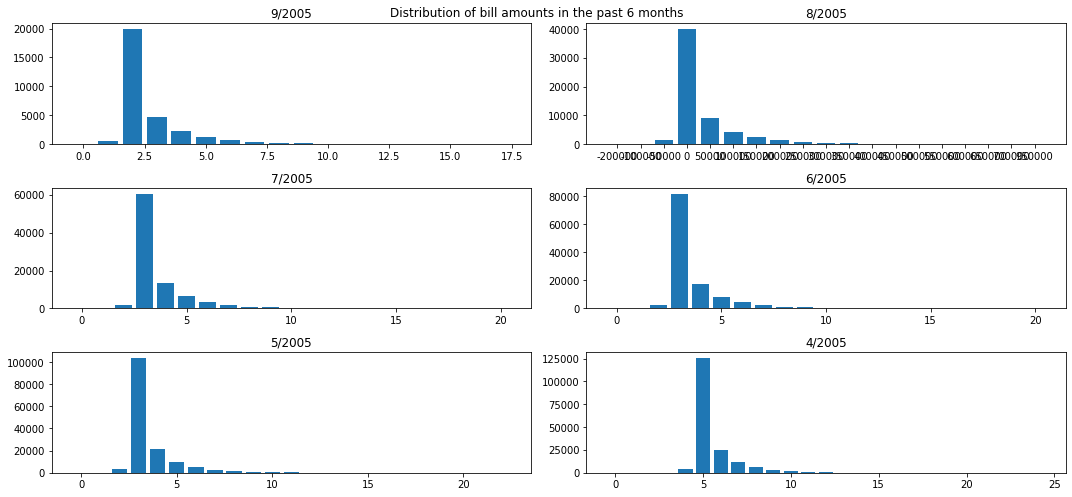

In [652]:
#another suggested way
#trying another method (plot verus bar)

fig = plt.figure(figsize=(15, 7))
plt.suptitle('Distribution of bill amounts in the past 6 months')

plt.subplot(321)
plt.bar(range(len(b1.values)), b1.values)

plt.title("9/2005")

plt.subplot(322)
plt.bar(range(len(b2.values)), b2.values)
plt.xticks(range(len(b2.values)), b2.index)
plt.title("8/2005")

plt.subplot(323)
plt.bar(range(len(b3.values)), b3.values)
plt.title("7/2005")

plt.subplot(324)
plt.bar(range(len(b4.values)), b4.values)
plt.title("6/2005")

plt.subplot(325)
plt.bar(range(len(b5.values)), b5.values)
plt.title("5/2005")

plt.subplot(326)
plt.bar(range(len(b6.values)), b6.values)
plt.title("4/2005")

plt.tight_layout()

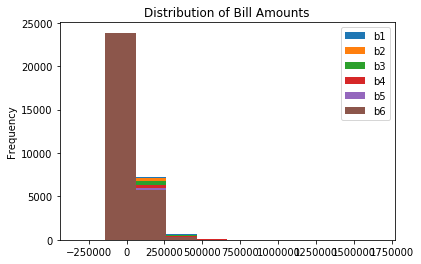

In [162]:
b.plot(kind = "hist", title = "Distribution of Bill Amounts")

# Yet these plots work when called separately using plot not plt

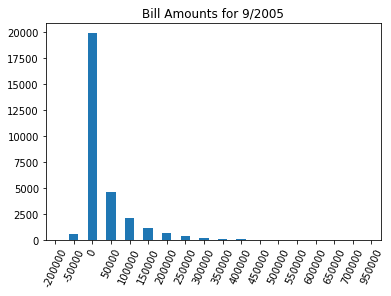

In [163]:
b1.plot(kind="bar", rot = '65', title = "Bill Amounts for 9/2005")

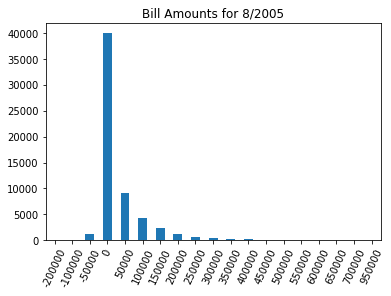

In [164]:
b2.plot(kind="bar", rot = '65', title = "Bill Amounts for 8/2005")

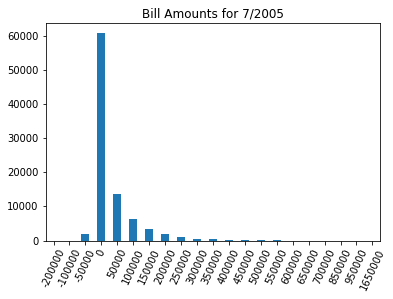

In [165]:
b3.plot(kind="bar", rot = '65', title = "Bill Amounts for 7/2005")

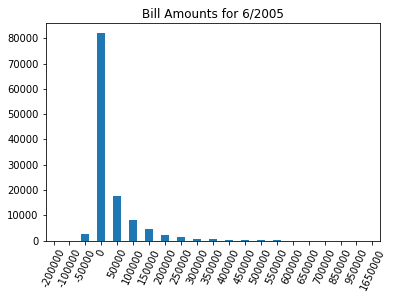

In [166]:
b4.plot(kind="bar", rot = '65', title = "Bill Amounts for 6/2005")

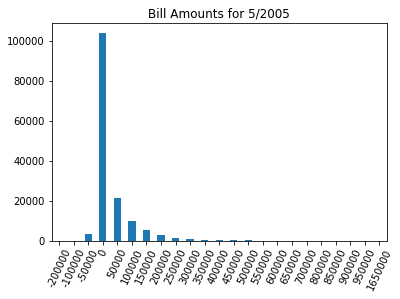

In [167]:
b5.plot(kind="bar", rot = '65', title = "Bill Amounts for 5/2005")

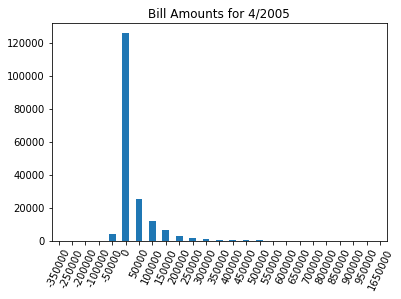

In [168]:
b6.plot(kind="bar", rot = '65', title = "Bill Amounts for 4/2005")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11e6fc630>,
      dtype=object)

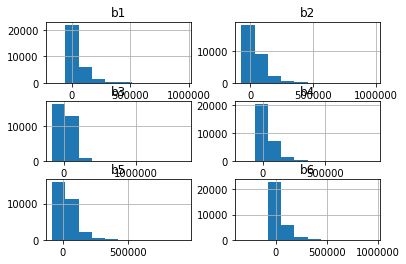

In [169]:
b.hist()

In [170]:
print("Sample of Bill Amounts")
b.columns = ["9/2005", '8/2005', '7/2005', '6/2005', '5/2005', '4/2005']
b.head(10)

Sample of Bill Amounts


,9/2005,8/2005,7/2005,6/2005,5/2005,4/2005
0,3913,3102,689,0,0,0
1,2682,1725,2682,3272,3455,3261
2,29239,14027,13559,14331,14948,15549
3,46990,48233,49291,28314,28959,29547
4,8617,5670,35835,20940,19146,19131
5,64400,57069,57608,19394,19619,20024
6,367965,412023,445007,542653,483003,473944
7,11876,380,601,221,-159,567
8,11285,14096,12108,12211,11793,3719
9,0,0,0,0,13007,13912


In [171]:
print("Description of Bill Amounts")
b.describe()

Description of Bill Amounts


,9/2005,8/2005,7/2005,6/2005,5/2005,4/2005
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400
std,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000
50%,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000
75%,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


In [172]:
pymt.columns = ["9/2005", '8/2005', '7/2005', '6/2005', '5/2005', '4/2005']
print("Description of Payment Amounts")
pymt.describe()

Description of Payment Amounts


,9/2005,8/2005,7/2005,6/2005,5/2005,4/2005
count,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


In [173]:
print("Sample of Payment Amounts")
pymt.head(10)

Sample of Payment Amounts


,9/2005,8/2005,7/2005,6/2005,5/2005,4/2005
0,0,689,0,0,0,0
1,0,1000,1000,1000,0,2000
2,1518,1500,1000,1000,1000,5000
3,2000,2019,1200,1100,1069,1000
4,2000,36681,10000,9000,689,679
5,2500,1815,657,1000,1000,800
6,55000,40000,38000,20239,13750,13770
7,380,601,0,581,1687,1542
8,3329,0,432,1000,1000,1000
9,0,0,0,13007,1122,0


In [174]:
late_payment = df[(df.p1 > 0) | (df.p2 > 0) | (df.p3 > 0) | (df.p4 > 0) | (df.p5 > 0) | (df.p6 > 0)]

# Late Payments by Marital Status

Total number of late payments by marital status:
Single     5344
Married    4588
Other       137
dtype: int64 

What percentage of single/married/other people have late payments?
Single:   33.5 %
Married:  33.6 %
Other:    36.3 %


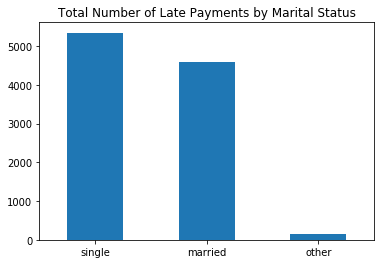

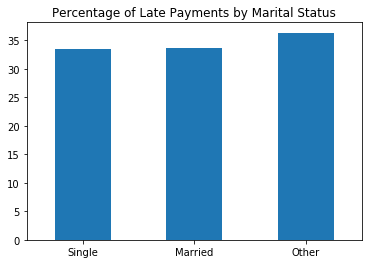

In [175]:
#those with late payments, grouped by marital status
mm= late_payment.groupby("married").size()
s = late_payment.groupby("married").size()[0]
m = late_payment.groupby("married").size()[1]
o = late_payment.groupby("married").size()[3]

#output
print("Total number of late payments by marital status:")
mm.index = ['Single', "Married", "Other"] #rename index
print(mm, '\n')

smo = pd.Series([s, m, o])
smo.index = ["single", "married", "other"]
smo.plot(kind = "bar", rot = 0, title = "Total Number of Late Payments by Marital Status")

#what percentage of single/married/other people have late payments?
sp = s/len(df[df.married == 0]) * 100
mp = m/len(df[df.married == 1]) * 100
op = o/len(df[df.married == 3]) * 100

print("What percentage of single/married/other people have late payments?")
print("Single:  ", round(sp, 1), "%")
print("Married: ", round(mp, 1), "%")
print("Other:   ", round(op, 1), "%")

#create new dataframe for percentages
agep = pd.DataFrame([sp, mp, op])
agep.index = ["Single", "Married", "Other"]
agep.plot(kind = "bar", rot = 0, title = "Percentage of Late Payments by Marital Status", legend = False)

# Late Payments by Age Groups

Number of Late Payments by Age
20s    3960
30s    3336
40s    1954
50s     714
60s     100
70s       5
dtype: int64 

What percentage of age groups have late payments?
20s:  41.2 %
30s:  29.7 %
40s:  30.2 %
50s:  30.5 %
60s:  31.8 %
70s:  20.0 %


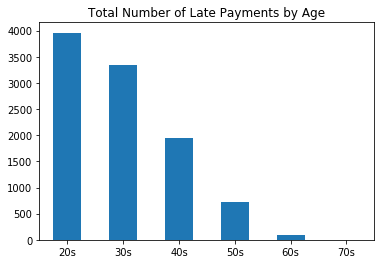

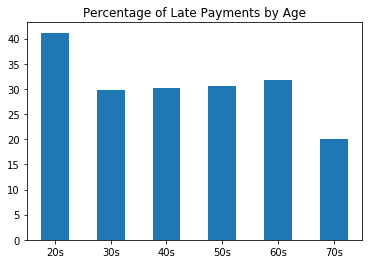

In [176]:
#those with late payments, grouped by age
age = late_payment.groupby("age").size()

#assigning ranges
age20 = age.loc[21:30].sum()
age30 = age.loc[31:40].sum()
age40 = age.loc[41:50].sum()
age50 = age.loc[51:60].sum()
age60 = age.loc[61:70].sum()
age70 = age.loc[71:80].sum()

#new series from the above ranges
ages = pd.Series([age20, age30, age40, age50, age60, age70])
ages.index = ["20s", "30s", "40s", "50s", "60s", "70s"] #relabel axis
print("Number of Late Payments by Age")
print(ages, "\n")

#draw the plot
ages.plot(kind = "bar", title = "Total Number of Late Payments by Age", rot = 0)

#group by decade
af = pd.DataFrame(df.age)
af["decades"] = (af.age//10)*10
af = af.groupby("decades").size()
#print(af[20])

#what percentage of the age groups have late payments?
a20 = age20/af.loc[20] *100 
a30 = age30/af.loc[30] *100 
a40 = age40/af.loc[40] *100 
a50 = age50/af.loc[50] *100 
a60 = age60/af.loc[60] *100 
a70 = age70/af.loc[70] *100 

print("What percentage of age groups have late payments?")
print("20s: ", round(a20, 1), "%")
print("30s: ", round(a30, 1), "%")
print("40s: ", round(a40, 1), "%")
print("50s: ", round(a50, 1), "%")
print("60s: ", round(a60, 1), "%")
print("70s: ", round(a70, 1), "%")

#Create a dataframe to plot (for percentages)
afp = pd.DataFrame([a20, a30, a40, a50, a60, a70])
afp.index = ["20s", "30s", "40s", "50s", "60s", "70s"] #relabel axis
afp.plot(kind = 'bar', title = "Percentage of Late Payments by Age", rot = 0, legend = None)

# Late Payments by Sex

Late Payments by Sex
Male      4182
Female    5887
dtype: int64 

Percentage of Late Payments by Sex
Male      35.2
Female    32.5
Name: 0, dtype: float64


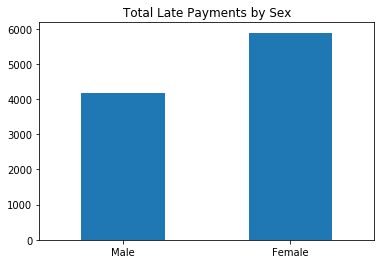

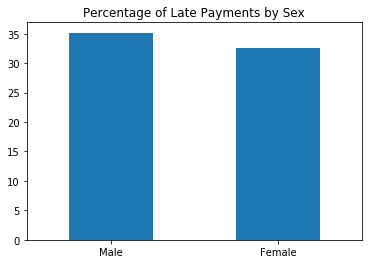

In [177]:
#those with late payments, grouped by sex
sex = late_payment.groupby("sex").size()
sex.index = ["Male", "Female"]

print("Late Payments by Sex")
print(sex, '\n')

sex.plot(kind = "Bar", rot = 0, title = "Total Late Payments by Sex")

#Percentage of late payments by sex
malep   = sex[0]/len(df[df.sex == 1]) * 100
femalep = sex[1]/len(df[df.sex == 2]) * 100

#new dataframe for plotting percentages
sexp = pd.DataFrame([malep, femalep])
sexp.index = ["Male", "Female"]

print("Percentage of Late Payments by Sex")
print(round(sexp[0], 1))
sexp.plot(kind = "bar", title = "Percentage of Late Payments by Sex", rot = 0, legend = False)

# Late Payments by Education

Late Payments by Education
Grad_School    3230
University     4897
HS             1866
other            76
dtype: int64 

Percentage of Late Payments by Education
Grad_School    30.5
University     34.9
HS             37.9
other          16.2
Name: 0, dtype: float64


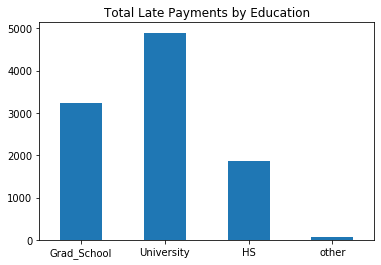

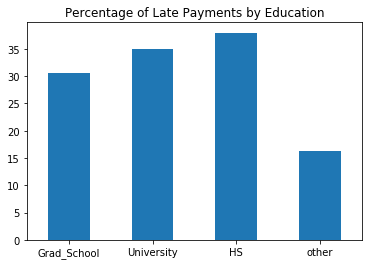

In [181]:
# those with late payments, grouped by education, 
# (1 = graduate school; 2 = university; 3 = high school; 4 = others)
ed = late_payment.groupby("ed.").size()
ed.index = ["Grad_School", "University", "HS", "other"]
print("Late Payments by Education")
print(ed, '\n')

ed.plot(kind = "Bar", rot = 0, title = "Total Late Payments by Education")

#Percentage of late payments by education
gsp   = ed[0]/len(df[df['ed.'] == 1]) * 100
univp = ed[1]/len(df[df['ed.'] == 2]) * 100
hsp   = ed[2]/len(df[df['ed.'] == 3]) * 100
oedp  = ed[3]/len(df[df['ed.'] == 4]) * 100

#new dataframe for plotting percentages
edp = pd.DataFrame([gsp, univp, hsp, oedp])
edp.index = ["Grad_School", "University", "HS", "other"]

print("Percentage of Late Payments by Education")
print(round(edp[0], 1))
edp.plot(kind = "bar", title = "Percentage of Late Payments by Education", rot = 0, legend = False)

# Late Payments by Credit Limit

Late Payments by Credit Limit
            total
cred_limit       
0            2377
50000        2769
100000       1426
150000       1005
200000       1080
250000        432
300000        285
350000        347
400000        127
450000         79
500000        119
550000          9
600000          7
650000          2
700000          4
750000          1 




Percentage Late Payments by Credit Limit
$00K     55.1 %
$50K     38.8 %
$100K    37.1 %
$150K    28.2 %
$200K    26.5 %
$250K    22.2 %
$300K    18.6 %
$350K    22.9 %
$400K    18.6 %
$450K    17.0 %
$500K    15.3 %
$550K    16.1 %
$600K    14.0 %
$650K    14.3 %
$700K    19.0 %
$750K    10.0 %


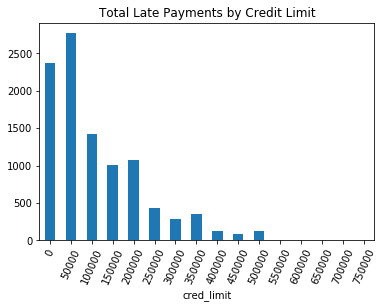

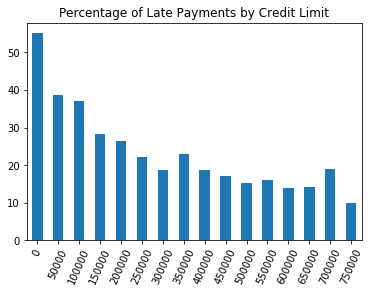

In [329]:
# those with late payments, grouped by credit limit
cl = pd.DataFrame(late_payment.groupby("limit_bal").size())
cl = cl.reset_index()
cl.columns = ["limit_bal", "total"]
cl['cred_limit'] = (cl.limit_bal // 50000) * 50000 #categorical groups
del cl['limit_bal']
print("Late Payments by Credit Limit")
cl = cl.groupby("cred_limit").sum()

cl.plot(kind = "Bar", rot = 66, title = "Total Late Payments by Credit Limit", legend = False)

print(cl, '\n\n')

#Percentage of late payments by cred_limit
cl0   = cl.iloc[0]/ len(df[df['limit_bal'] <  50000]) * 100
cl50  = cl.iloc[1]/ len(df[(df['limit_bal'] >= 50000)  & (df['limit_bal'] < 100000)]) * 100
cl100 = cl.iloc[2]/ len(df[(df['limit_bal'] >= 100000) & (df['limit_bal'] < 150000)]) * 100
cl150 = cl.iloc[3]/ len(df[(df['limit_bal'] >= 150000) & (df['limit_bal'] < 200000)]) * 100
cl200 = cl.iloc[4]/ len(df[(df['limit_bal'] >= 200000) & (df['limit_bal'] < 250000)]) * 100
cl250 = cl.iloc[5]/ len(df[(df['limit_bal'] >= 250000) & (df['limit_bal'] < 300000)]) * 100
cl300 = cl.iloc[6]/ len(df[(df['limit_bal'] >= 300000) & (df['limit_bal'] < 350000)]) * 100
cl350 = cl.iloc[7]/ len(df[(df['limit_bal'] >= 350000) & (df['limit_bal'] < 400000)]) * 100
cl400 = cl.iloc[8]/ len(df[(df['limit_bal'] >= 400000) & (df['limit_bal'] < 450000)]) * 100
cl450 = cl.iloc[9]/ len(df[(df['limit_bal'] >= 450000) & (df['limit_bal'] < 500000)]) * 100
cl500 = cl.iloc[10]/len(df[(df['limit_bal'] >= 500000) & (df['limit_bal'] < 550000)]) * 100
cl550 = cl.iloc[11]/len(df[(df['limit_bal'] >= 550000) & (df['limit_bal'] < 600000)]) * 100
cl600 = cl.iloc[12]/len(df[(df['limit_bal'] >= 600000) & (df['limit_bal'] < 650000)]) * 100
cl650 = cl.iloc[13]/len(df[(df['limit_bal'] >= 650000) & (df['limit_bal'] < 700000)]) * 100
cl700 = cl.iloc[14]/len(df[(df['limit_bal'] >= 700000) & (df['limit_bal'] < 750000)]) * 100
cl750 = cl.iloc[15]/len(df[df['limit_bal'] >= 750000]) * 100

print("\n")
print("Percentage Late Payments by Credit Limit")
print("$00K    ", round(cl0[0], 1), '%')
print("$50K    ", round(cl50[0], 1), '%')
print("$100K   ", round(cl100[0], 1), '%')
print("$150K   ", round(cl150[0], 1), '%')
print("$200K   ", round(cl200[0], 1), '%')
print("$250K   ", round(cl250[0], 1), '%')
print("$300K   ", round(cl300[0], 1), '%')
print("$350K   ", round(cl350[0], 1), '%')
print("$400K   ", round(cl400[0], 1), '%')
print("$450K   ", round(cl450[0], 1), '%')
print("$500K   ", round(cl500[0], 1), '%')
print("$550K   ", round(cl550[0], 1), '%')
print("$600K   ", round(cl600[0], 1), '%')
print("$650K   ", round(cl650[0], 1), '%')
print("$700K   ", round(cl700[0], 1), '%')
print("$750K   ", round(cl750[0], 1), '%')

#new dataframe for plotting percentages
clp = pd.DataFrame([cl0,cl50,cl100,cl150,cl200,cl250,cl300,cl350,cl400,cl450,cl500,cl550,cl600,cl650,cl700,cl750])

clp.plot(kind = "bar", title = "Percentage of Late Payments by Credit Limit", rot = 66, legend = False)

# Adding a column to indicate any late payments
This is not very efficient


In [419]:
#reset index to move index into columns
lp = late_payment.reset_index()

#get the new index column as a series
values = lp['index']

#new list
late_indexes = []

#getting just the (values) column from the series and adding it to a list//stripping off the index
for i in range(len(values)):
    late_indexes.append(values.iloc[i])

#new list
yes_no = []

#load a list with yes or no values to indicate missing payment
for i in range(len(df)):
    if i in late_indexes:
        yes_no.append(1)
    else:
        yes_no.append(0)

#add new column to df from above list
df["missing_payment"] = yes_no

df.head()

,limit_bal,sex,ed.,married,age,p1,p2,p3,p4,p5,p6,b1,b2,b3,b4,b5,b6,pymt1,pymt2,pymt3,pymt4,pymt5,pymt6,default pymt nxt mo.,missing_payment
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,1
1,120000,2,2,0,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,1
2,90000,2,2,0,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,0
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,0
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,0


# Late Payments Based on Balance Amount

In [494]:
b["missed"] = df.missing_payment
b.head()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,9/2005,8/2005,7/2005,6/2005,5/2005,4/2005,missed
0,3913,3102,689,0,0,0,1
1,2682,1725,2682,3272,3455,3261,1
2,29239,14027,13559,14331,14948,15549,0
3,46990,48233,49291,28314,28959,29547,0
4,8617,5670,35835,20940,19146,19131,0


In [563]:
#split bill columns into separate dataframes (where missed == 1)
bill1 = pd.DataFrame(b['9/2005'])
bill1['missed'] = b.missed
bill1 = bill1[bill1.missed == 1]
del bill1['missed']

bill2 = pd.DataFrame(b['8/2005'])
bill2['missed'] = b.missed
bill2 = bill2[bill2.missed == 1]
del bill2['missed']

bill3 = pd.DataFrame(b['7/2005'])
bill3['missed'] = b.missed
bill3 = bill3[bill3.missed == 1]
del bill3['missed']

bill4 = pd.DataFrame(b['6/2005'])
bill4['missed'] = b.missed
bill4 = bill4[bill4.missed == 1]
del bill4['missed']

bill5 = pd.DataFrame(b['5/2005'])
bill5['missed'] = b.missed
bill5 = bill5[bill5.missed == 1]
del bill5['missed']

bill6 = pd.DataFrame(b['4/2005'])
bill6['missed'] = b.missed
bill6 = bill6[bill6.missed == 1]
del bill6['missed']

In [564]:
#categorical ranges
bill1['groups'] = (bill1['9/2005'] // 10000) * 10000
bill2['groups'] = (bill2['8/2005'] // 10000) * 10000
bill3['groups'] = (bill3['7/2005'] // 10000) * 10000
bill4['groups'] = (bill4['6/2005'] // 10000) * 10000
bill5['groups'] = (bill5['5/2005'] // 10000) * 10000
bill6['groups'] = (bill6['4/2005'] // 10000) * 10000

#group by new ranges
bill1 = bill1.groupby("groups").size()
bill2 = bill2.groupby("groups").size()
bill3 = bill3.groupby("groups").size()
bill4 = bill4.groupby("groups").size()
bill5 = bill5.groupby("groups").size()
bill6 = bill6.groupby("groups").size()

#rename columns
bill1.columns = ['ranges', 'totals']
bill2.columns = ['ranges', 'totals']
bill3.columns = ['ranges', 'totals']
bill4.columns = ['ranges', 'totals']
bill5.columns = ['ranges', 'totals']
bill6.columns = ['ranges', 'totals']

## Subplots not working here either

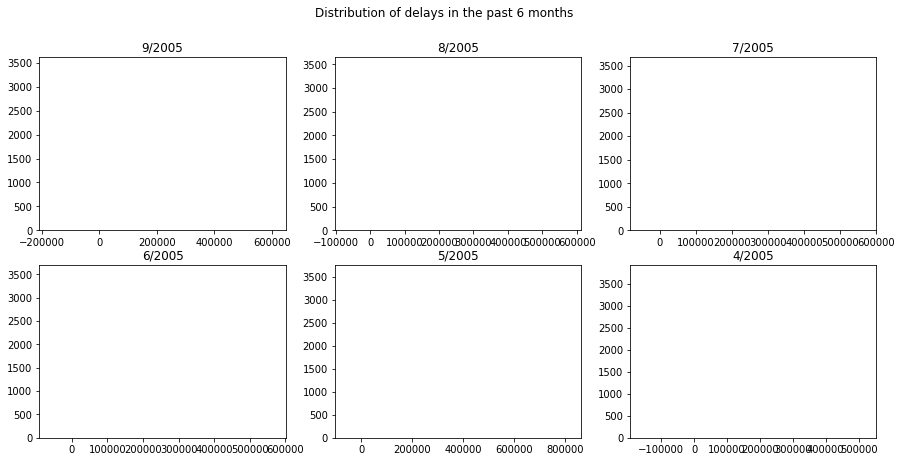

In [552]:
fig = plt.figure(figsize=(15, 7))
plt.suptitle('Distribution of delays in the past 6 months')

plt.subplot(231)
plt.bar(bill1.index, bill1.values)
plt.title("9/2005")

plt.subplot(2,3,2)
plt.bar(bill2.index, bill2.values)
plt.title("8/2005")

plt.subplot(2,3,3)
plt.bar(bill3.index, bill3.values)
plt.title("7/2005")

plt.subplot(2,3,4)
plt.bar(bill4.index, bill4.values)
plt.title("6/2005")

plt.subplot(2,3,5)
plt.bar(bill5.index, bill5.values)
plt.title("5/2005")

plt.subplot(236)
plt.bar(bill6.index, bill6.values)
plt.title("4/2005")

plt.show()

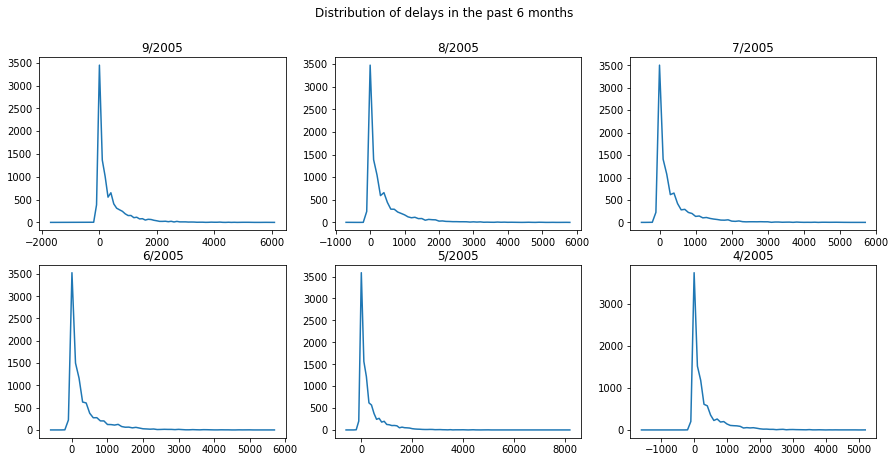

In [654]:
fig = plt.figure(figsize=(15, 7))
plt.suptitle('Distribution of delays in the past 6 months')

plt.subplot(231)
plt.plot(bill1.index/100, bill1.values)
plt.title("9/2005")

plt.subplot(2,3,2)
plt.plot(bill2.index/100, bill2.values)
plt.title("8/2005")

plt.subplot(2,3,3)
plt.plot(bill3.index/100, bill3.values)
plt.title("7/2005")

plt.subplot(2,3,4)
plt.plot(bill4.index/100, bill4.values)
plt.title("6/2005")

plt.subplot(2,3,5)
plt.plot(bill5.index/100, bill5.values)
plt.title("5/2005")

plt.subplot(236)
plt.plot(bill6.index/100, bill6.values)
plt.title("4/2005")

plt.show()

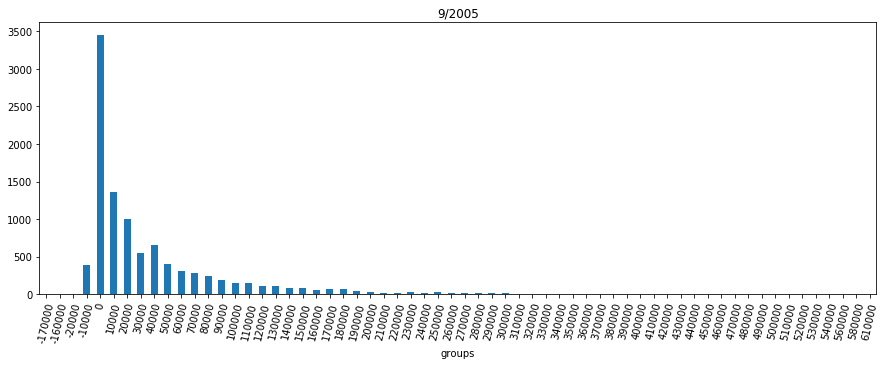

In [565]:
bill1.plot(kind = "bar", title = "9/2005", figsize = (15,5), rot = 77)

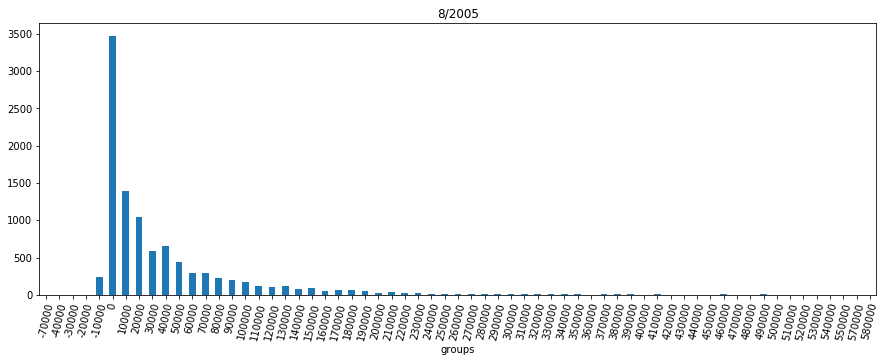

In [554]:
bill2.plot(kind = "bar", title = "8/2005", figsize = (15,5), rot = 77)

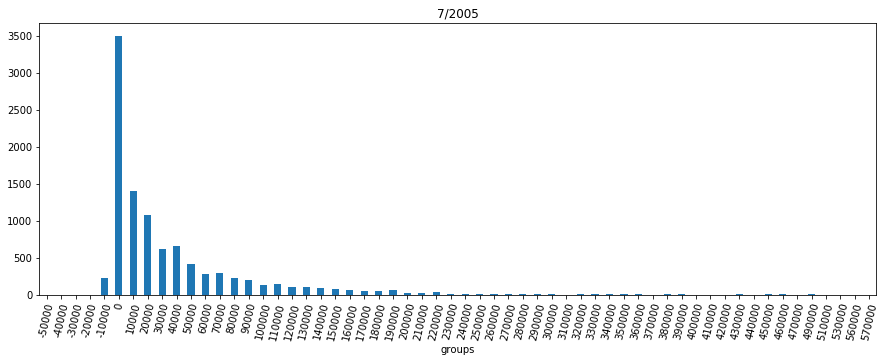

In [555]:
bill3.plot(kind = "bar", title = "7/2005", figsize = (15,5), rot = 77)

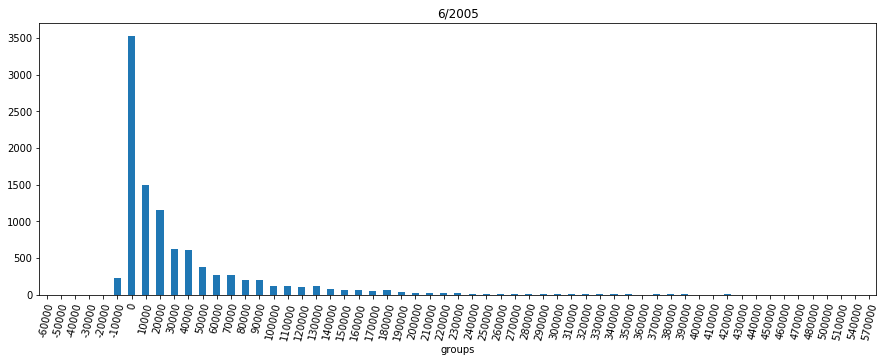

In [556]:
bill4.plot(kind = "bar", title = "6/2005", figsize = (15,5), rot = 77)

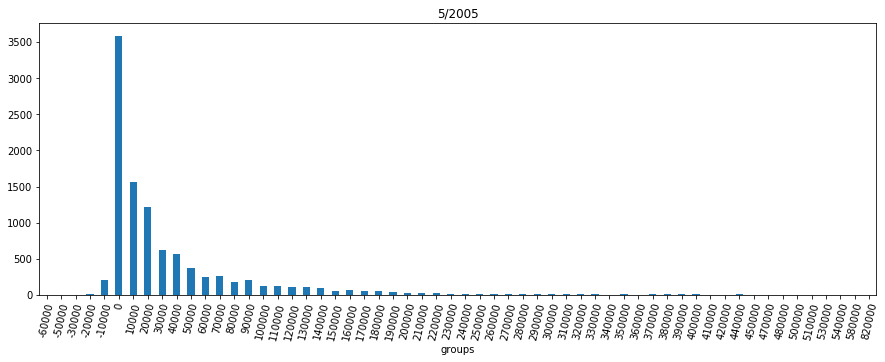

In [557]:
bill5.plot(kind = "bar", title = "5/2005", figsize = (15,5), rot = 77)

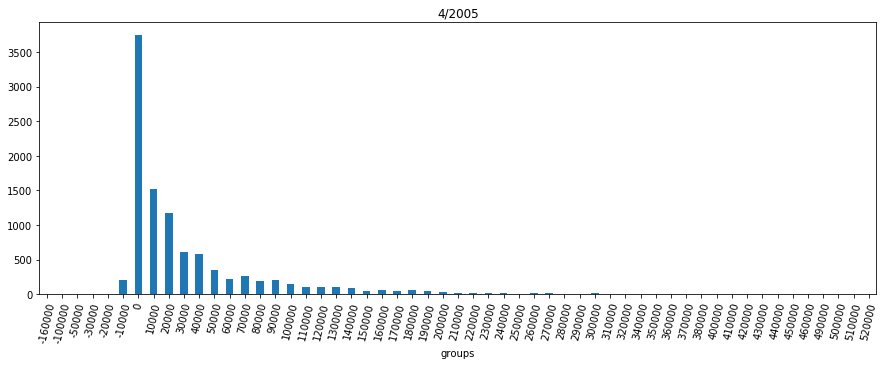

In [558]:
bill6.plot(kind = "bar", title = "4/2005", figsize = (15,5), rot = 77)

In [559]:
print("Late Payments by Bill Amount in 9/2005")
print(bill1)
print("\n")

print("Late Payments by Bill Amount in 8/2005")
print(bill2)
print("\n")

print("Late Payments by Bill Amount in 7/2005")
print(bill3)
print("\n")

print("Late Payments by Bill Amount in 6/2005")
print(bill4)
print("\n")

print("Late Payments by Bill Amount in 5/2005")
print(bill5)
print("\n")

print("Late Payments by Bill Amount in 4/2005")
print(bill6)
print("\n")


Late Payments by Bill Amount in 9/2005
groups
-170000       1
-160000       1
-20000        4
-10000      385
 0         3447
 10000     1367
 20000     1007
 30000      554
 40000      650
 50000      407
 60000      312
 70000      277
 80000      244
 90000      188
 100000     151
 110000     152
 120000     104
 130000     114
 140000      77
 150000      82
 160000      52
 170000      69
 180000      64
 190000      47
 200000      36
 210000      23
 220000      23
 230000      26
 240000      16
 250000      25
           ... 
 280000      12
 290000      12
 300000      12
 310000       8
 320000       9
 330000       8
 340000       4
 350000       5
 360000       5
 370000       2
 380000       3
 390000       6
 400000       4
 410000       4
 420000       7
 430000       2
 440000       1
 450000       4
 460000       1
 470000       3
 480000       1
 490000       2
 500000       3
 510000       3
 520000       3
 530000       2
 540000       1
 560000       1
 580000   

## The Percentage of late payments by bill amount

In [751]:
b0p =  bill1.loc[-10000] / len(b[ b['9/2005'] < 0 ]) * 100
b1p =  bill1.loc[0]      / len(b[  (b['9/2005'] < 10000) & (b['9/2005'] >= 0)   ] ) * 100
b2p =  bill1.loc[10000]  / len(b[  (b['9/2005'] < 20000) & (b['9/2005'] >= 10000)   ] ) * 100
b3p =  bill1.loc[20000]  / len(b[  (b['9/2005'] < 30000) & (b['9/2005'] >= 20000)   ] ) * 100
b4p =  bill1.loc[30000]  / len(b[  (b['9/2005'] < 40000) & (b['9/2005'] >= 30000)   ] ) * 100
b5p =  bill1.loc[40000]  / len(b[  (b['9/2005'] < 50000) & (b['9/2005'] >= 40000)   ] ) * 100
b6p =  bill1.loc[50000]  / len(b[  (b['9/2005'] < 60000) & (b['9/2005'] >= 50000)   ] ) * 100
b7p =  bill1.loc[60000]  / len(b[  (b['9/2005'] < 70000) & (b['9/2005'] >= 60000)   ] ) * 100
b8p =  bill1.loc[70000]  / len(b[  (b['9/2005'] < 80000) & (b['9/2005'] >= 70000)   ] ) * 100
b9p =  bill1.loc[80000]  / len(b[  (b['9/2005'] < 90000) & (b['9/2005'] >= 80000)   ] ) * 100
b10p = bill1.loc[90000]  / len(b[  (b['9/2005'] < 100000) &(b['9/2005'] >= 90000)   ] ) * 100
b11p = bill1.loc[100000] / len(b[   b['9/2005'] > 100000]) * 100

print("Late Payment Percentage by Bill Amount for 9/2005")
print("Less than 0: ", round(b0p, 1), "%")
print("0-$10,000:   ", round(b1p, 1), "%")
print("$10k-$20k:   ", round(b2p, 1), "%")
print("$20k-$30k:   ", round(b3p, 1), "%")
print("$30k-$40k:   ", round(b4p, 1), "%")
print("$40k-$50k:   ", round(b5p, 1), "%")
print("$50k-$60k:   ", round(b6p, 1), "%")
print("$60k-$70k:   ", round(b7p, 1), "%")
print("$70k-$80k:   ", round(b8p, 1), "%")
print("$80k-$90k:   ", round(b9p, 1), "%")
print("$90k-$100k:  ", round(b10p, 1), "%")
print("over $100:   ", round(b11p, 1), "%")

bill1p = pd.DataFrame([b0p, b1p, b2p, b3p, b4p, b5p, b6p, b7p, b8p, b9p, b10p, b11p])

Late Payment Percentage by Bill Amount for 9/2005
Less than 0:  65.3 %
0-$10,000:    33.6 %
$10k-$20k:    38.5 %
$20k-$30k:    40.5 %
$30k-$40k:    36.3 %
$40k-$50k:    31.1 %
$50k-$60k:    30.7 %
$60k-$70k:    32.1 %
$70k-$80k:    30.0 %
$80k-$90k:    32.6 %
$90k-$100k:   29.7 %
over $100:    3.1 %


In [752]:
b0p =  bill2.loc[-10000] / len(b[ b['8/2005'] < 0 ]) * 100
b1p =  bill2.loc[0]      / len(b[  (b['8/2005'] < 10000) & (b['8/2005'] >= 0)   ] ) * 100
b2p =  bill2.loc[10000]  / len(b[  (b['8/2005'] < 20000) & (b['8/2005'] >= 10000)   ] ) * 100
b3p =  bill2.loc[20000]  / len(b[  (b['8/2005'] < 30000) & (b['8/2005'] >= 20000)   ] ) * 100
b4p =  bill2.loc[30000]  / len(b[  (b['8/2005'] < 40000) & (b['8/2005'] >= 30000)   ] ) * 100
b5p =  bill2.loc[40000]  / len(b[  (b['8/2005'] < 50000) & (b['8/2005'] >= 40000)   ] ) * 100
b6p =  bill2.loc[50000]  / len(b[  (b['8/2005'] < 60000) & (b['8/2005'] >= 50000)   ] ) * 100
b7p =  bill2.loc[60000]  / len(b[  (b['8/2005'] < 70000) & (b['8/2005'] >= 60000)   ] ) * 100
b8p =  bill2.loc[70000]  / len(b[  (b['8/2005'] < 80000) & (b['8/2005'] >= 70000)   ] ) * 100
b9p =  bill2.loc[80000]  / len(b[  (b['8/2005'] < 90000) & (b['8/2005'] >= 80000)   ] ) * 100
b10p = bill2.loc[90000]  / len(b[  (b['8/2005'] < 100000) &(b['8/2005'] >= 90000)   ] ) * 100
b11p = bill2.loc[100000] / len(b[   b['8/2005'] > 100000]) * 100

print("Late Payment Percentage by Bill Amount for 8/2005")
print("Less than 0: ", round(b0p, 1), "%")
print("0-$10,000:   ", round(b1p, 1), "%")
print("$10k-$20k:   ", round(b2p, 1), "%")
print("$20k-$30k:   ", round(b3p, 1), "%")
print("$30k-$40k:   ", round(b4p, 1), "%")
print("$40k-$50k:   ", round(b5p, 1), "%")
print("$50k-$60k:   ", round(b6p, 1), "%")
print("$60k-$70k:   ", round(b7p, 1), "%")
print("$70k-$80k:   ", round(b8p, 1), "%")
print("$80k-$90k:   ", round(b9p, 1), "%")
print("$90k-$100k:  ", round(b10p, 1), "%")
print("over $100:   ", round(b11p, 1), "%")

bill2p = pd.DataFrame([b0p, b1p, b2p, b3p, b4p, b5p, b6p, b7p, b8p, b9p, b10p, b11p])

Late Payment Percentage by Bill Amount for 8/2005
Less than 0:  36.2 %
0-$10,000:    33.4 %
$10k-$20k:    39.3 %
$20k-$30k:    40.8 %
$30k-$40k:    36.8 %
$40k-$50k:    32.5 %
$50k-$60k:    34.2 %
$60k-$70k:    29.3 %
$70k-$80k:    33.2 %
$80k-$90k:    31.7 %
$90k-$100k:   31.2 %
over $100:    3.6 %


In [753]:
b0p =  bill3.loc[-10000] / len(b[ b['7/2005'] < 0 ]) * 100
b1p =  bill3.loc[0]      / len(b[  (b['7/2005'] < 10000) & (b['7/2005'] >= 0)   ] ) * 100
b2p =  bill3.loc[10000]  / len(b[  (b['7/2005'] < 20000) & (b['7/2005'] >= 10000)   ] ) * 100
b3p =  bill3.loc[20000]  / len(b[  (b['7/2005'] < 30000) & (b['7/2005'] >= 20000)   ] ) * 100
b4p =  bill3.loc[30000]  / len(b[  (b['7/2005'] < 40000) & (b['7/2005'] >= 30000)   ] ) * 100
b5p =  bill3.loc[40000]  / len(b[  (b['7/2005'] < 50000) & (b['7/2005'] >= 40000)   ] ) * 100
b6p =  bill3.loc[50000]  / len(b[  (b['7/2005'] < 60000) & (b['7/2005'] >= 50000)   ] ) * 100
b7p =  bill3.loc[60000]  / len(b[  (b['7/2005'] < 70000) & (b['7/2005'] >= 60000)   ] ) * 100
b8p =  bill3.loc[70000]  / len(b[  (b['7/2005'] < 80000) & (b['7/2005'] >= 70000)   ] ) * 100
b9p =  bill3.loc[80000]  / len(b[  (b['7/2005'] < 90000) & (b['7/2005'] >= 80000)   ] ) * 100
b10p = bill3.loc[90000]  / len(b[  (b['7/2005'] < 100000) &(b['7/2005'] >= 90000)   ] ) * 100
b11p = bill3.loc[100000] / len(b[   b['7/2005'] > 100000]) * 100

print("Late Payment Percentage by Bill Amount for 7/2005")
print("Less than 0: ", round(b0p, 1), "%")
print("0-$10,000:   ", round(b1p, 1), "%")
print("$10k-$20k:   ", round(b2p, 1), "%")
print("$20k-$30k:   ", round(b3p, 1), "%")
print("$30k-$40k:   ", round(b4p, 1), "%")
print("$40k-$50k:   ", round(b5p, 1), "%")
print("$50k-$60k:   ", round(b6p, 1), "%")
print("$60k-$70k:   ", round(b7p, 1), "%")
print("$70k-$80k:   ", round(b8p, 1), "%")
print("$80k-$90k:   ", round(b9p, 1), "%")
print("$90k-$100k:  ", round(b10p, 1), "%")
print("over $100:   ", round(b11p, 1), "%")

bill3p = pd.DataFrame([b0p, b1p, b2p, b3p, b4p, b5p, b6p, b7p, b8p, b9p, b10p, b11p])

Late Payment Percentage by Bill Amount for 7/2005
Less than 0:  34.2 %
0-$10,000:    33.1 %
$10k-$20k:    37.8 %
$20k-$30k:    39.7 %
$30k-$40k:    37.4 %
$40k-$50k:    34.1 %
$50k-$60k:    33.7 %
$60k-$70k:    30.0 %
$70k-$80k:    32.6 %
$80k-$90k:    32.6 %
$90k-$100k:   31.8 %
over $100:    3.1 %


In [754]:
b0p =  bill4.loc[-10000] / len(b[ b['6/2005'] < 0 ]) * 100
b1p =  bill4.loc[0]      / len(b[  (b['6/2005'] < 10000) & (b['6/2005'] >= 0)   ] ) * 100
b2p =  bill4.loc[10000]  / len(b[  (b['6/2005'] < 20000) & (b['6/2005'] >= 10000)   ] ) * 100
b3p =  bill4.loc[20000]  / len(b[  (b['6/2005'] < 30000) & (b['6/2005'] >= 20000)   ] ) * 100
b4p =  bill4.loc[30000]  / len(b[  (b['6/2005'] < 40000) & (b['6/2005'] >= 30000)   ] ) * 100
b5p =  bill4.loc[40000]  / len(b[  (b['6/2005'] < 50000) & (b['6/2005'] >= 40000)   ] ) * 100
b6p =  bill4.loc[50000]  / len(b[  (b['6/2005'] < 60000) & (b['6/2005'] >= 50000)   ] ) * 100
b7p =  bill4.loc[60000]  / len(b[  (b['6/2005'] < 70000) & (b['6/2005'] >= 60000)   ] ) * 100
b8p =  bill4.loc[70000]  / len(b[  (b['6/2005'] < 80000) & (b['6/2005'] >= 70000)   ] ) * 100
b9p =  bill4.loc[80000]  / len(b[  (b['6/2005'] < 90000) & (b['6/2005'] >= 80000)   ] ) * 100
b10p = bill4.loc[90000]  / len(b[  (b['6/2005'] < 100000) &(b['6/2005'] >= 90000)   ] ) * 100
b11p = bill4.loc[100000] / len(b[   b['6/2005'] > 100000]) * 100

print("Late Payment Percentage by Bill Amount for 6/2005")
print("Less than 0: ", round(b0p, 1), "%")
print("0-$10,000:   ", round(b1p, 1), "%")
print("$10k-$20k:   ", round(b2p, 1), "%")
print("$20k-$30k:   ", round(b3p, 1), "%")
print("$30k-$40k:   ", round(b4p, 1), "%")
print("$40k-$50k:   ", round(b5p, 1), "%")
print("$50k-$60k:   ", round(b6p, 1), "%")
print("$60k-$70k:   ", round(b7p, 1), "%")
print("$70k-$80k:   ", round(b8p, 1), "%")
print("$80k-$90k:   ", round(b9p, 1), "%")
print("$90k-$100k:  ", round(b10p, 1), "%")
print("over $100:   ", round(b11p, 1), "%")

bill4p = pd.DataFrame([b0p, b1p, b2p, b3p, b4p, b5p, b6p, b7p, b8p, b9p, b10p, b11p])

Late Payment Percentage by Bill Amount for 6/2005
Less than 0:  33.0 %
0-$10,000:    32.4 %
$10k-$20k:    37.1 %
$20k-$30k:    38.7 %
$30k-$40k:    38.6 %
$40k-$50k:    35.0 %
$50k-$60k:    33.5 %
$60k-$70k:    31.9 %
$70k-$80k:    32.6 %
$80k-$90k:    31.5 %
$90k-$100k:   33.7 %
over $100:    3.1 %


In [755]:
b0p =  bill5.loc[-10000] / len(b[ b['5/2005'] < 0 ]) * 100
b1p =  bill5.loc[0]      / len(b[  (b['5/2005'] < 10000) & (b['5/2005'] >= 0)   ] ) * 100
b2p =  bill5.loc[10000]  / len(b[  (b['5/2005'] < 20000) & (b['5/2005'] >= 10000)   ] ) * 100
b3p =  bill5.loc[20000]  / len(b[  (b['5/2005'] < 30000) & (b['5/2005'] >= 20000)   ] ) * 100
b4p =  bill5.loc[30000]  / len(b[  (b['5/2005'] < 40000) & (b['5/2005'] >= 30000)   ] ) * 100
b5p =  bill5.loc[40000]  / len(b[  (b['5/2005'] < 50000) & (b['5/2005'] >= 40000)   ] ) * 100
b6p =  bill5.loc[50000]  / len(b[  (b['5/2005'] < 60000) & (b['5/2005'] >= 50000)   ] ) * 100
b7p =  bill5.loc[60000]  / len(b[  (b['5/2005'] < 70000) & (b['5/2005'] >= 60000)   ] ) * 100
b8p =  bill5.loc[70000]  / len(b[  (b['5/2005'] < 80000) & (b['5/2005'] >= 70000)   ] ) * 100
b9p =  bill5.loc[80000]  / len(b[  (b['5/2005'] < 90000) & (b['5/2005'] >= 80000)   ] ) * 100
b10p = bill5.loc[90000]  / len(b[  (b['5/2005'] < 100000) &(b['5/2005'] >= 90000)   ] ) * 100
b11p = bill5.loc[100000] / len(b[   b['5/2005'] > 100000]) * 100

print("Late Payment Percentage by Bill Amount for 5/2005")
print("Less than 0: ", round(b0p, 1), "%")
print("0-$10,000:   ", round(b1p, 1), "%")
print("$10k-$20k:   ", round(b2p, 1), "%")
print("$20k-$30k:   ", round(b3p, 1), "%")
print("$30k-$40k:   ", round(b4p, 1), "%")
print("$40k-$50k:   ", round(b5p, 1), "%")
print("$50k-$60k:   ", round(b6p, 1), "%")
print("$60k-$70k:   ", round(b7p, 1), "%")
print("$70k-$80k:   ", round(b8p, 1), "%")
print("$80k-$90k:   ", round(b9p, 1), "%")
print("$90k-$100k:  ", round(b10p, 1), "%")
print("over $100:   ", round(b11p, 1), "%")

bill5p = pd.DataFrame([b0p, b1p, b2p, b3p, b4p, b5p, b6p, b7p, b8p, b9p, b10p, b11p])

Late Payment Percentage by Bill Amount for 5/2005
Less than 0:  31.0 %
0-$10,000:    31.4 %
$10k-$20k:    37.6 %
$20k-$30k:    39.6 %
$30k-$40k:    40.1 %
$40k-$50k:    35.5 %
$50k-$60k:    35.0 %
$60k-$70k:    30.1 %
$70k-$80k:    32.2 %
$80k-$90k:    30.7 %
$90k-$100k:   34.3 %
over $100:    3.4 %


In [756]:
b0p =  bill6.loc[-10000] / len(b[ b['4/2005'] < 0 ]) * 100
b1p =  bill6.loc[0]      / len(b[  (b['4/2005'] < 10000) & (b['4/2005'] >= 0)   ] ) * 100
b2p =  bill6.loc[10000]  / len(b[  (b['4/2005'] < 20000) & (b['4/2005'] >= 10000)   ] ) * 100
b3p =  bill6.loc[20000]  / len(b[  (b['4/2005'] < 30000) & (b['4/2005'] >= 20000)   ] ) * 100
b4p =  bill6.loc[30000]  / len(b[  (b['4/2005'] < 40000) & (b['4/2005'] >= 30000)   ] ) * 100
b5p =  bill6.loc[40000]  / len(b[  (b['4/2005'] < 50000) & (b['4/2005'] >= 40000)   ] ) * 100
b6p =  bill6.loc[50000]  / len(b[  (b['4/2005'] < 60000) & (b['4/2005'] >= 50000)   ] ) * 100
b7p =  bill6.loc[60000]  / len(b[  (b['4/2005'] < 70000) & (b['4/2005'] >= 60000)   ] ) * 100
b8p =  bill6.loc[70000]  / len(b[  (b['4/2005'] < 80000) & (b['4/2005'] >= 70000)   ] ) * 100
b9p =  bill6.loc[80000]  / len(b[  (b['4/2005'] < 90000) & (b['4/2005'] >= 80000)   ] ) * 100
b10p = bill6.loc[90000]  / len(b[  (b['4/2005'] < 100000) &(b['4/2005'] >= 90000)   ] ) * 100
b11p = bill6.loc[100000] / len(b[   b['4/2005'] > 100000]) * 100

print("Late Payment Percentage by Bill Amount for 4/2005")
print("Less than 0: ", round(b0p, 1), "%")
print("0-$10,000:   ", round(b1p, 1), "%")
print("$10k-$20k:   ", round(b2p, 1), "%")
print("$20k-$30k:   ", round(b3p, 1), "%")
print("$30k-$40k:   ", round(b4p, 1), "%")
print("$40k-$50k:   ", round(b5p, 1), "%")
print("$50k-$60k:   ", round(b6p, 1), "%")
print("$60k-$70k:   ", round(b7p, 1), "%")
print("$70k-$80k:   ", round(b8p, 1), "%")
print("$80k-$90k:   ", round(b9p, 1), "%")
print("$90k-$100k:  ", round(b10p, 1), "%")
print("over $100:   ", round(b11p, 1), "%")

bill6p = pd.DataFrame([b0p, b1p, b2p, b3p, b4p, b5p, b6p, b7p, b8p, b9p, b10p, b11p])

Late Payment Percentage by Bill Amount for 4/2005
Less than 0:  29.4 %
0-$10,000:    31.2 %
$10k-$20k:    38.3 %
$20k-$30k:    39.7 %
$30k-$40k:    40.4 %
$40k-$50k:    36.8 %
$50k-$60k:    32.7 %
$60k-$70k:    30.0 %
$70k-$80k:    34.2 %
$80k-$90k:    31.3 %
$90k-$100k:   34.9 %
over $100:    4.0 %


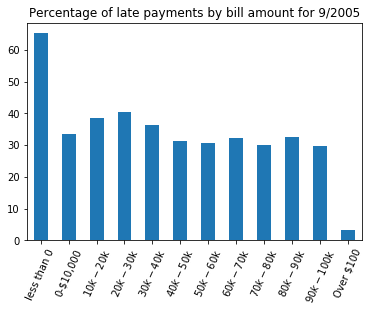

In [757]:
index = ["less than 0","0-$10,000","$10k-$20k","$20k-$30k","$30k-$40k", "$40k-$50k", "$50k-$60k", "$60k-$70k", "$70k-$80k", "$80k-$90k", "$90k-$100k", "Over $100"]
bill1p.index = index
bill1p.plot(kind = "bar", title = "Percentage of late payments by bill amount for 9/2005", rot = 66, legend = False)

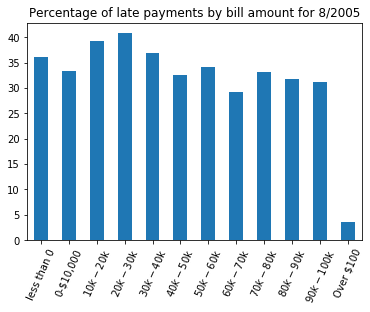

In [758]:
bill2p.index = index
bill2p.plot(kind = "bar", title = "Percentage of late payments by bill amount for 8/2005", rot = 66, legend = False)

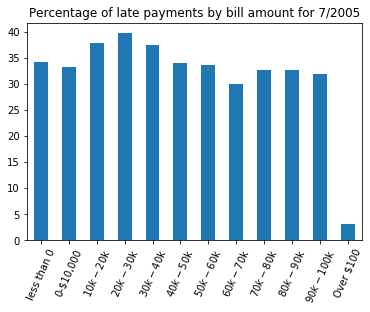

In [759]:
bill3p.index = index
bill3p.plot(kind = "bar", title = "Percentage of late payments by bill amount for 7/2005", rot = 66, legend = False)

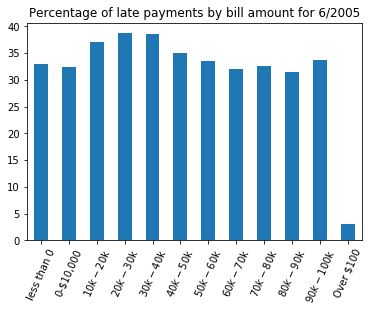

In [760]:
bill4p.index = index
bill4p.plot(kind = "bar", title = "Percentage of late payments by bill amount for 6/2005", rot = 66, legend = False)

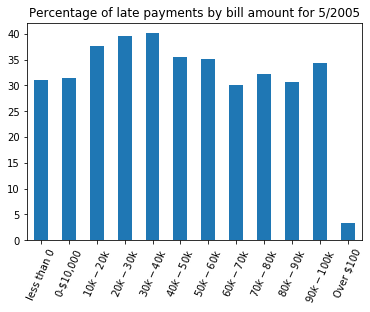

In [761]:
bill5p.index = index
bill5p.plot(kind = "bar", title = "Percentage of late payments by bill amount for 5/2005", rot = 66, legend = False)

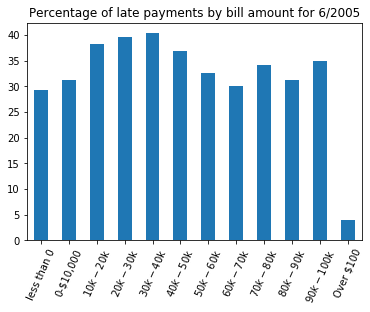

In [762]:
bill6p.index = index
bill6p.plot(kind = "bar", title = "Percentage of late payments by bill amount for 6/2005", rot = 66, legend = False)

In [763]:
bill1p['9/2005'] = bill1p[0]
bill1p['8/2005'] = bill2p
bill1p['7/2005'] = bill3p
bill1p['6/2005'] = bill4p
bill1p['5/2005'] = bill5p
bill1p['4/2005'] = bill6p

bills = bill1p

del bills[0]
bills

,9/2005,8/2005,7/2005,6/2005,5/2005,4/2005
less than 0,65.254237,36.173393,34.198473,33.037037,30.992366,29.360465
"0-$10,000",33.619428,33.410271,33.134639,32.423240,31.360895,31.244779
$10k-$20k,38.496198,39.253394,37.758112,37.070882,37.641396,38.323656
$20k-$30k,40.539452,40.788447,39.704797,38.725817,39.647864,39.650538
$30k-$40k,36.280288,36.838830,37.379227,38.584615,40.142672,40.356671
$40k-$50k,31.130268,32.509881,34.080250,34.988453,35.518102,36.811780
$50k-$60k,30.740181,34.155744,33.680834,33.512064,35.041938,32.688766
$60k-$70k,32.098765,29.270729,30.010718,31.934732,30.074257,30.013280
$70k-$80k,30.010834,33.181300,32.550336,32.624113,32.203390,34.162304
$80k-$90k,32.620321,31.680441,32.551320,31.481481,30.664395,31.291391


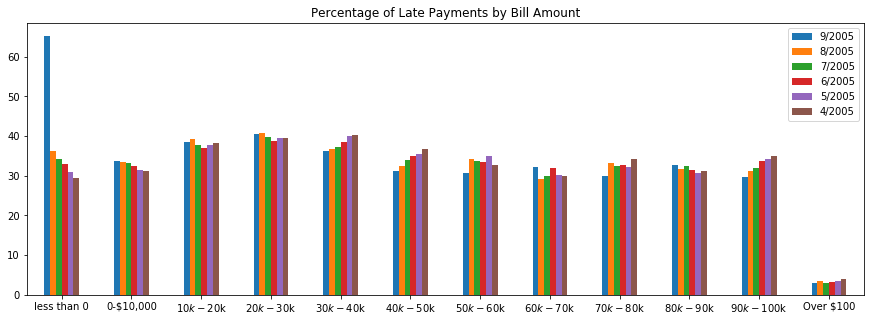

In [764]:
bills.plot(kind = "bar", figsize = (15,5), rot = 0, title = "Percentage of Late Payments by Bill Amount")